# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** MIRZA MAULANA
- **Email:** mirzamaulana525@gmail.com
- **ID Dicoding:** mirza_maulana18

In [1]:
!pip install pipreqs

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.3/798.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.4 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=9d3a9f3bd4885ed4c9d5f2f8619bbfa652e7a147b14a7d05d223d6c57d7f50af
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
Successfully built docopt
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.12.3 which is incompatible.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pipreqs "/content/drive/MyDrive/Colab Notebooks" --scan-notebooks

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca dan pengaruh suhu terhadap jumlah penyewa sepeda pada hari kerja dan hari libur
- Kapan peak season penyewaan sepeda dalam sehari dan apakah polanya sama antara weekdays dan weekend?

## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
#GATHERING DATA DAY
day_df = pd.read_csv("day.csv")
day_df.head()



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


 Pada proses diatas, kita gathering data atau memasukan data kedalam lembar kerja Collab dan membaca 5 data teratas saja. Untuk memudahkan kita melihat isi dataset

In [6]:
#GATHERING DATA HOUR
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Terlihat pada code diatas akan menampilkan dataset yang telah kita masukan sebelumnya yaitu dataset day dan hour.
- Disini saya menggunakan head() untuk memunculkan max 5 data saja agar tampilan lebih ringkas

### Assessing Data

In [7]:
#ASSESING DATA DAY
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Pada proses assesing data baik pada dataset day maupun dataset hour, kita melihat jumlah dari kolom yang kosong atau tidak berisi untuk selanjutnya dapat dilakukan tindakan baik penghapusan kolom atau pengisian kolom tersebut. Namun pada dataset ini, semua kolom terisi (ada isinya)

In [8]:
#MELIHAT MISSING VALUE PADA DATASET DAY.
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Melihat missing value bertujuan untuk melihat nilai yang hilang dalam sebuah dataset. Misal pada kolom windspeed bisa saja pada baris ke 1000 - 1005 valuenya kosong. Ini dapat kita tangani dengan menggunakann misalnya mean / median dari value yang ada. Namun dalam case ini, dataset day dan hour bersih dari missing value

In [9]:
#MELIHAT JUMLAH DUPLIKASI DATA DALAM DATASET DAY
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Melihat jumlah duplikasi berarti melihat data yang double. Jika ada kita wajib menghapusnya untuk membuat visualisasi yang sesuai

In [ ]:
#MELIHAT RINGKASAN PARAMETER STATISTIK DALAM DATASET DAY
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
#ASSESING DATA HOUR
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
#MELIHAT MISSING VALUE DALAM DATASET HOUR
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [12]:
#MELIHAT DUPLIKASI DATA DALAM DATASET HOUR
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [13]:
#MELIHAT PARAMETER STATISTIK DALAM DATASET HOUR
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dapat dilihat pada proses assesing data diatas, saya melakukan pengecekan data mulai dari pengecekan duplikasi, missing value hingga ringkasan statistik. Didapati dataset day dan hour bersih dari duplikasi, dan missing value namun terdapat kesalahan tipe data pada dteday yang mana tipe datanya object yang seharusnya datetime karena berisi tanggal. Akan diperbaiki pada tahap Cleaning Data



### Cleaning Data

In [14]:
#MELAKUKAN PERUBAHAN TIPE DATA PADA DATASET DAY
datetime_columns = ["dteday"]
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

#Melihat info terbaru (tipe data baru)
day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Pada langkah diatas, kita mengubah tipe data karena tipe datanya tidak sesuai dengan yang seharusnya. Awalnya obj jadi datetime

In [15]:
#MELAKUKAN PERUBAHAN TIPE DATA PADA DATASET HOUR
datetime_columns = ["dteday"]
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

#Melihat info terbaru (tipe data baru)
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Berdasarkan hasil diatas, dapat dilihat bahwa perubahan tipe data telah dilakukan agar sesuai dengan yang seharusnya

## Exploratory Data Analysis (EDA)

### Explore Dataset Day

In [18]:
#MENGGANTI NAMA VARIABEL BIAR JELAS
day_df.rename(columns={
    'cnt': 'total_count',
    'temp': 'temperature',
    'hum': 'humidity',
    'windspeed': 'wind_speed',
    'weekday': 'is_weekday',
    'workingday': 'is_workingday',
    'weathersit': 'weather_condition'
}, inplace=True)

Pada langkah diatas, kita mengganti (memperjelas) nama kolom misal cnt menjadi total_count takutnya orang lain yang membaca bisa misinterpretasi jika tidak membaca dokumentasi databasenya (file readme)

In [19]:
# MEMISAHKAN DATA ANTARA HARI LIBUR DAN HARI KERJA
workingday_data = day_df[day_df['is_workingday'] == 1]
holiday_data = day_df[day_df['is_workingday'] == 0]


Untuk menjawab pertanyaan yg sudah dirumuskan, hal ini perlu dilakukan untuk melihat perbedaan antara weekday dan weekend

In [20]:
#MAPPING KONDISI CUACA SESUAI DATASET
weather_mapping = {
    1: 'Clear, Few clouds, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
}

#TERAPKAN MAPING
day_df['weather_condition'] = day_df['weather_condition'].map(weather_mapping)

Mapping dilakukan untuk memperjelas / membuat keputusan untuk weather yang digunakan. (Menetapkan aturan)

In [21]:
#UBAH NILAI SUHU KE NILAI AKTUAL (SEBELUM DIBAGI 41 SEPERTI DI DATASET)
day_df['temperature_actual'] = day_df['temperature'] * 41


Ini dilakukan karena berdasarkan dataset, suhu yang ada sudah dilakukan kalkulasi sehingga hasilnya 0,2 0,3 0,4 dst yang mana membuat bingung pembaca yang tidak melihat dokumentasi dataset. Maka disini kita ubah ke ukuran suhu awal (dikali 41) untuk memunculkan suhu awal sehingga saat analisis suhunya bisa dimengerti pebaca

### Explore Dataset Hour


In [22]:
#MENGGANTI NAMA VARIABLE
hour_df.rename(columns={
    'cnt': 'total_count',
    'temp': 'temperature',
    'hum': 'humidity',
    'windspeed': 'wind_speed',
    'weekday': 'is_weekday',
    'workingday': 'is_workingday',
    'weathersit': 'weather_condition'
}, inplace=True)

In [23]:
#CONVERT DATETIME KARENA FORMAT AWAL TIDAK SESUAI
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [24]:
#TAMBAH KOLOM WEEKDAYS DAN WEEKEND
hour_df['is_weekend'] = hour_df['is_weekday'].apply(lambda x: 'Weekend' if x in [0, 6] else 'Weekday')

In [25]:
#GROUP BY WEEKDAY DAN WEEKEND
try:
    weekday_data = hour_df[hour_df['is_weekend'] == 'Weekday'].groupby('hr')['total_count'].mean()
    weekend_data = hour_df[hour_df['is_weekend'] == 'Weekend'].groupby('hr')['total_count'].mean()
except Exception as e:
    print("Error during grouping:", e)




In [26]:
#MENGANALISIS PEAK SEASON PADA HOUR PENYEWAAN SEPEDA
weekday_peak_hour = weekday_data.idxmax()
weekday_peak_count = weekday_data.max()

weekend_peak_hour = weekend_data.idxmax()
weekend_peak_count = weekend_data.max()

print(f"Peak penyewaan pada weekday terjadi pada jam {weekday_peak_hour} dengan rata-rata {weekday_peak_count:.2f} penyewa.")
print(f"Peak penyewaan pada weekend terjadi pada jam {weekend_peak_hour} dengan rata-rata {weekend_peak_count:.2f} penyewa.")

Peak penyewaan pada weekday terjadi pada jam 17 dengan rata-rata 515.92 penyewa.
Peak penyewaan pada weekend terjadi pada jam 13 dengan rata-rata 380.15 penyewa.


**Insight:**
- Pada EDA Dataset Day, dapat kita lihat bahwa kita menerapkan maping baru untuk menyesuaika kriteria cuaca yang ada pada dataset yang awalnya 1 2 3 4 menjadi nama cuaca seperti clear, mist, dan lainnya.

- Pada EDA Dataset Hour, dapat dilihat terdapat group baru yaitu Weekend dan Weekday. Kemudian hasil analisis peak season dapat dilihat bahwa pada Weekday, terjadi pukul 17:00 dengan rata rata 515.92 penyewa dan pada Weekend terjadi pada pukul 13:00 dengan rata rata 380.15 penyewa

In [27]:
# Hitung nilai aktual suhu untuk dataset workingday_data dan holiday_data
workingday_data['temperature_actual'] = workingday_data['temperature'] * 41
holiday_data['temperature_actual'] = holiday_data['temperature'] * 41

<ipython-input-27-dc906e0f0ec3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  workingday_data['temperature_actual'] = workingday_data['temperature'] * 41
<ipython-input-27-dc906e0f0ec3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holiday_data['temperature_actual'] = holiday_data['temperature'] * 41


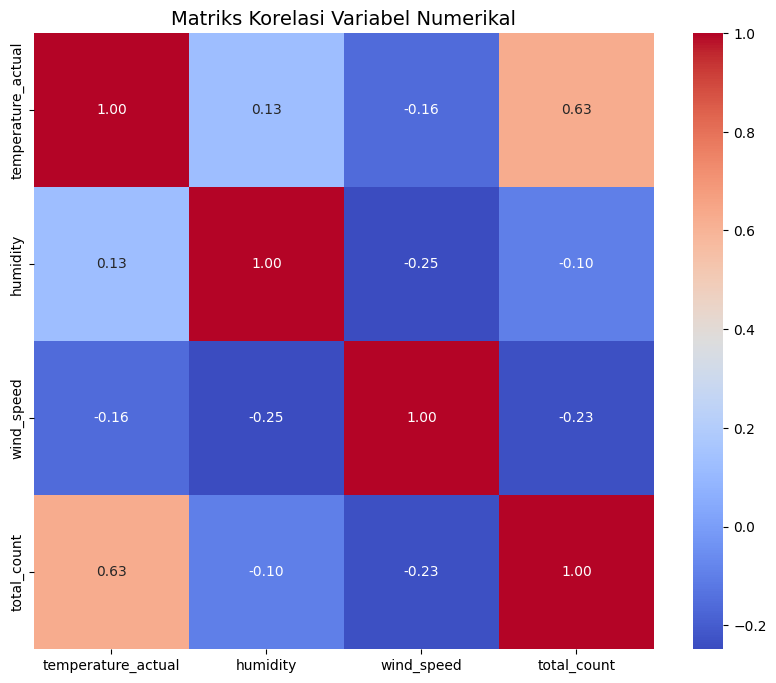

In [31]:
# Korelasi antar variabel numerikal
plt.figure(figsize=(10, 8))
corr_matrix = day_df[['temperature_actual', 'humidity', 'wind_speed', 'total_count']].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Matriks Korelasi Variabel Numerikal', fontsize=14)
plt.show()


**Warna merah pekat (+1.00): Korelasi sangat kuat positif (berbanding lurus)**
**Warna biru pekat (-1.00): Korelasi sangat kuat negatif (berbanding terbalik)**
**Warna netral (putih/biru muda/merah muda ~ 0.00): Korelasi lemah atau tidak ada hubungan**


-Suhu (temperature_actual) adalah faktor paling berpengaruh terhadap jumlah penyewa sepeda.

-Kecepatan angin (wind_speed) memiliki sedikit dampak negatif pada jumlah penyewa.

-Kelembapan (humidity) tidak memiliki pengaruh signifikan terhadap jumlah penyewa.

**Analisis**

- Temperature_actual VS Total_count memiliki korelasi kuat (warna merah). Hal ini masuk akal karena semakin suhu tinggi, jumlah penyewa tentu semakin dikit

- Humidty VS Total_count. Hampir tidak memiliki hubungan. artinya kelembapan memang tidak begitu berpengaruh

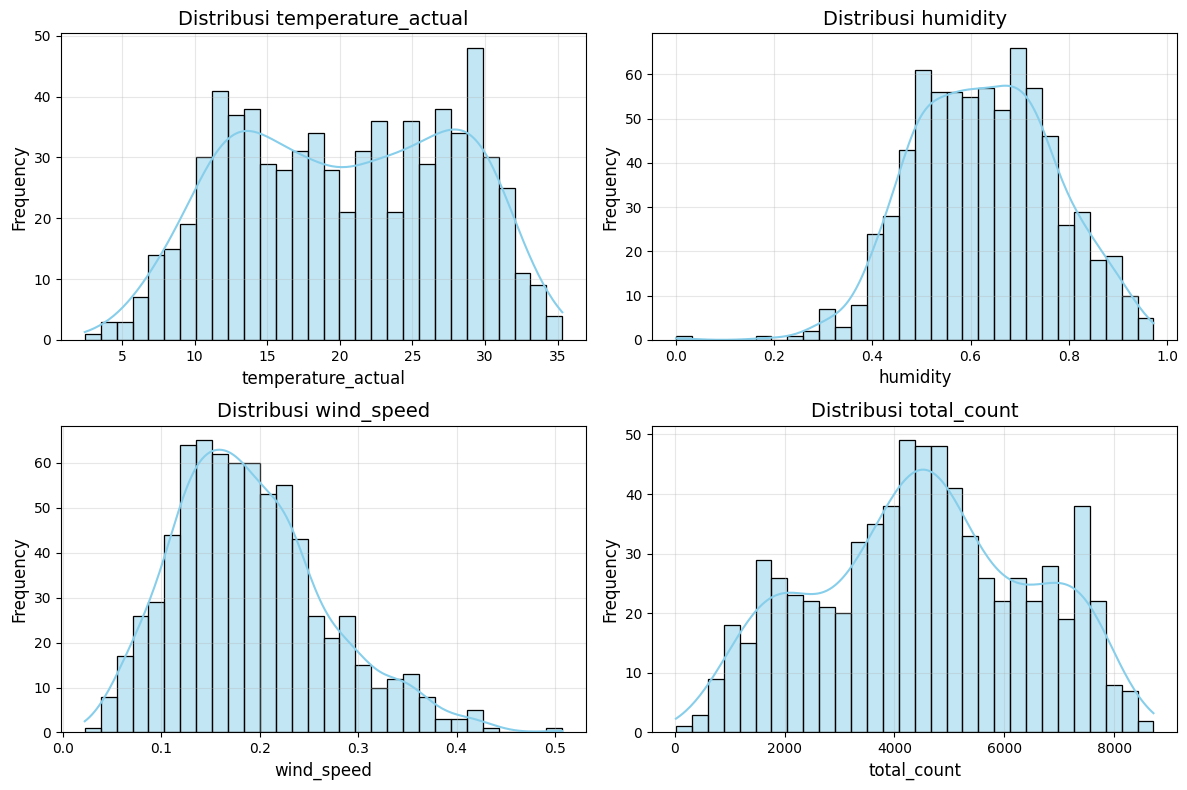

In [36]:
numerical_features = ['temperature_actual', 'humidity', 'wind_speed', 'total_count']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(day_df[feature], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribusi {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Suhu dan kelembapan memiliki distribusi normal, dengan suhu sekitar 20-25°C dan kelembapan sekitar 60-80%.
Kecepatan angin condong ke kiri, menunjukkan sebagian besar hari memiliki angin yang rendah.
Jumlah penyewa sepeda memiliki distribusi hampir normal, dengan beberapa lonjakan di nilai tinggi.

In [49]:
#Pengaruh Cuaca dan Suhu terhadap Jumlah Penyewa Sepeda pada Hari Kerja vs Hari Libur
#Agregasi berdasarkan hari kerja dan hari libur
agg_weather = day_df.groupby(['is_workingday', 'weather_condition'])['total_count'].mean().reset_index()
agg_temp = day_df.groupby(['is_workingday', 'temperature_actual'])['total_count'].mean().reset_index()

print("Agregasi Berdasarkan Cuaca:")
print(agg_weather)

print("\nAgregasi Berdasarkan Suhu:")
print(agg_temp)

Agregasi Berdasarkan Cuaca:
   is_workingday                                  weather_condition  \
0              0                   Clear, Few clouds, Partly cloudy   
1              0  Light Snow, Light Rain + Thunderstorm + Scatte...   
2              0  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...   
3              1                   Clear, Few clouds, Partly cloudy   
4              1  Light Snow, Light Rain + Thunderstorm + Scatte...   
5              1  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...   

   total_count  
0  4587.269231  
1  1815.400000  
2  3936.828571  
3  5023.902280  
4  1799.500000  
5  4075.028249  

Agregasi Berdasarkan Suhu:
     is_workingday  temperature_actual  total_count
0                0            2.424346        981.0
1                0            3.957390        986.0
2                0            5.227500       1529.0
3                0            5.671653        822.0
4                0            6.662500       1977.0
..             

**Hasil agregasi** : Pengaruh cuaca dan suhu bisa dianalisis dengan agregasi berdasarkan workingday dan weather_condition atau temperature_actual.

In [48]:
#Kapan Peak Season Penyewaan Sepeda dalam Sehari? Apakah Polanya Sama antara Weekdays dan Weekend?
#Agregasi jumlah penyewa berdasarkan jam dan weekdays/weekends
agg_hour = hour_df.groupby(['is_workingday', 'hr'])['total_count'].mean().reset_index()

print("Agregasi Penyewaan Sepeda Berdasarkan Jam:")
print(agg_hour)

Agregasi Penyewaan Sepeda Berdasarkan Jam:
    is_workingday  hr  total_count
0               0   0    90.800000
1               0   1    69.508696
2               0   2    53.171053
3               0   3    25.775330
4               0   4     8.264317
5               0   5     8.689189
6               0   6    18.742358
7               0   7    43.406926
8               0   8   105.653680
9               0   9   171.623377
10              0  10   255.909091
11              0  11   315.316017
12              0  12   366.259740
13              0  13   372.731602
14              0  14   364.645022
15              0  15   358.813853
16              0  16   352.727273
17              0  17   323.549784
18              0  18   281.056522
19              0  19   231.673913
20              0  20   174.739130
21              0  21   142.060870
22              0  22   116.060870
23              0  23    85.930435
24              1   0    36.786290
25              1   1    16.552632
26          

**Hasil agregasi** :
Peak season penyewaan sepeda dalam sehari bisa dianalisis dengan agregasi berdasarkan hour dan workingday.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca dan suhu terhadap jumlah penyewa sepeda pada hari kerja dan hari libur

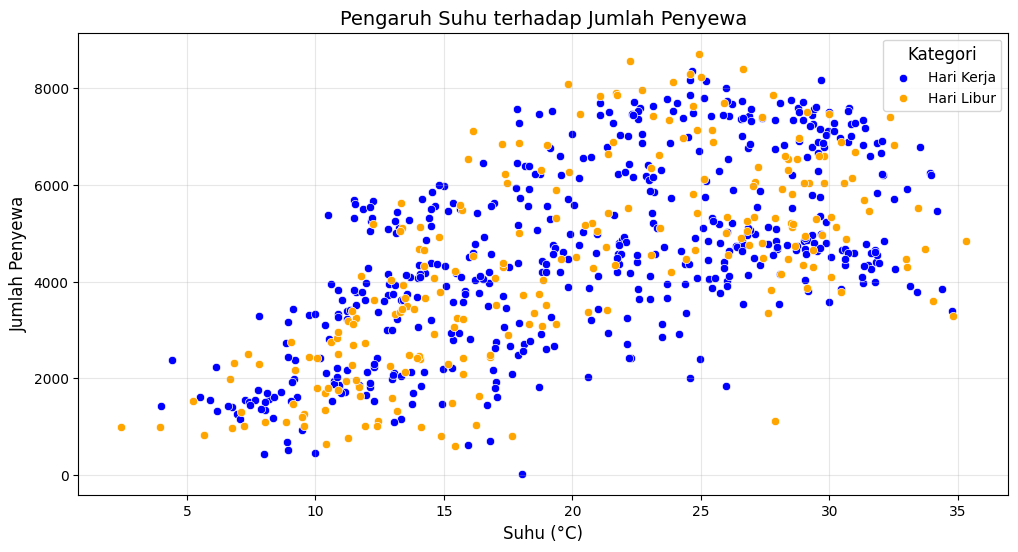

In [28]:
# Scatter plot suhu vs jumlah penyewa (hari kerja dan hari libur)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='temperature_actual', y='total_count', data=workingday_data, label='Hari Kerja', color='blue')
sns.scatterplot(x='temperature_actual', y='total_count', data=holiday_data, label='Hari Libur', color='orange')
plt.title('Pengaruh Suhu terhadap Jumlah Penyewa', fontsize=14)
plt.xlabel('Suhu (°C)', fontsize=12)
plt.ylabel('Jumlah Penyewa', fontsize=12)
plt.legend(title='Kategori', fontsize=10, title_fontsize=12)
plt.grid(alpha=0.3)
plt.show()

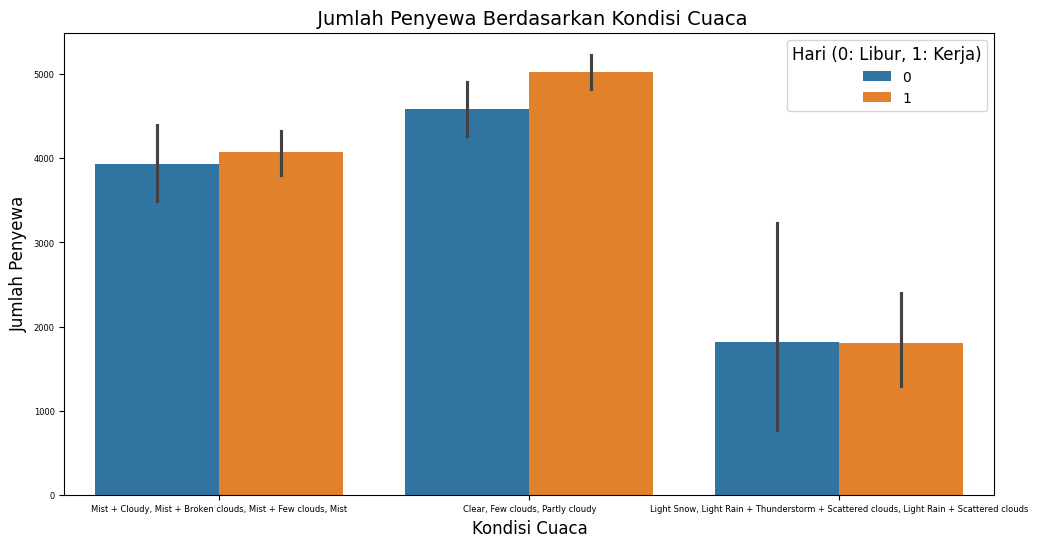

In [29]:
# Bar chart rata-rata jumlah penyewa berdasarkan kondisi cuaca
plt.figure(figsize=(12, 6))

sns.barplot(x='weather_condition', y='total_count', data=day_df, hue='is_workingday')
plt.title(' Jumlah Penyewa Berdasarkan Kondisi Cuaca', fontsize=14)
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Jumlah Penyewa', fontsize=12)
plt.legend(title='Hari (0: Libur, 1: Kerja)', title_fontsize=12, fontsize=10)  # Ukuran font legenda
plt.xticks(fontsize=6)  # Ukuran font untuk label sumbu X
plt.yticks(fontsize=6)  # Ukuran font untuk label sumbu Y
plt.show()

### Pertanyaan 2: Kapan peak season penyewaan sepeda dalam sehari dan apakah polanya sama antara weekdays dan weekend?

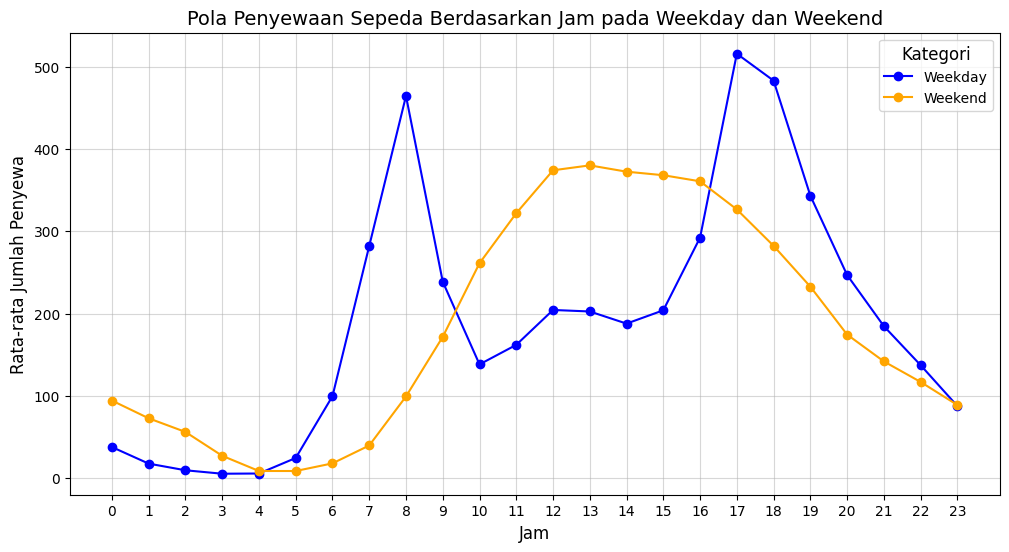

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(weekday_data.index, weekday_data.values, label='Weekday', color='blue', marker='o')
plt.plot(weekend_data.index, weekend_data.values, label='Weekend', color='orange', marker='o')
plt.title('Pola Penyewaan Sepeda Berdasarkan Jam pada Weekday dan Weekend', fontsize=14)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewa', fontsize=12)
plt.xticks(ticks=range(0, 24), fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Kategori', fontsize=10, title_fontsize=12)
plt.grid(alpha=0.5)
plt.show()

**Insight**

Pertanyaan 1, diagram 1

- Dapat dilihat persebaran dalam scatterplot menunjukkan angka penyewaan yang tinggi pada suhu normal sekitar 25 - 30 derajat. Ini menunjukkan adanya korelasi positif antara suhu dan jumlah penyewa sepeda. Sedangkan dapat dilihat bahwa suhu diatas 30 derajat mengalami penurunan jumlah penyewa.

Pertanyaan 1, diagram 2
- Dapat dilihat bahwa jumlah penyewaan sepeda baik pada hari libur atau hari kerja lebih tinggi pada kondisi cuaca yang baik yaitu Clear, sedikit berawan, atau sebagian berawan.

Pertanyaan 2
- Ddapat dilihat bahwa terjadi lonjakan penyewa sepeda pada jam sibuk di hari kerja yaitu dimulai dari jam 8 pagi dan jam 5 sore
- Pada hari libu, lonjakan terjadi pada jam 1 siang

## Conclusion


- Pada Pertanyaan 1

(Diagram 1)

a. Dapat dilihat pada diagram  scatterplot bahwa pengaruh suhu memang berdampak pada jumlah penyewa sepeda baik pada hari biasa ataupun  hari libur. Dapat dilihat persebaran dalam scatterplot menunjukkan angka penyewaan yang tinggi pada suhu normal sekitar 25 - 30 derajat. Ini menunjukkan adanya korelasi positif antara suhu dan jumlah penyewa sepeda

b. Dapat dilihat bahwa suhu diatas 30 derajat mengalami penurunan jumlah penyewa. Ini menunjukkan bahwa suhu yang terlalu panas membuat orang enggan untuk menyewa sepeda dan menggunakannya. Mungkin saja orang lebih memilih kendaraan yang tertutup karena suhu yang panas.

(Diagram 2)

a. Pada diagram batang diatas, dapat dilihat bahwa jumlah penyewaan sepeda baik pada hari libur atau hari kerja lebih tinggi pada kondisi cuaca yang baik yaitu Clear, sedikit berawan, atau sebagian berawan. Kondisi cuaca ini cocok untuk bepergian menggunakan sepeda. Perusahaan bisa mengambil peluang ini dengan memperbanyak armada / mengiklankan sepeda pada cuaca yang baik seperti ini. Mungkin iklan kesehatan dapat bermanfaat menarik lebih banyak penyewa.

b. Penyewaan sepeda terjadi penurunan pada cuaca yang bersalju, petir, dan hujan gerimis. Ini menandakan penyewaan sepeda kurang diminati pada musim salju / hujan.


- Pada pertanyaan 2

a. Pada diagram garis diatas, dapat kita lihat bahwa jumlah penyewa sepeda tertinggi terjadi pada jam 8 pagi dan jam 17 atau 5 sore pada hari kerja. Ini selaras dengan kegiatan orang yang pergi ke tempat kerja dan jam pulang kerja. Penyewaan sepeda tertinggi pada jam sibuk / rush hour seperti ini. Perusahaan dapat lebih banyak menyediakan armada pada jam sibuk seperti ini dan mendapatkan keuntungan lebih banyak

b. Pada hari libur, jumlah penyewaan tertinggi terjadi pada jam 1 siang dimana orang bepergian untuk rekreasi.